In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [64]:
path = "/content/drive/MyDrive/CPE495/aqiindoor.csv"
df = pd.read_csv(path)
df.head()

,Date_Time,AQI_PM2.5,AQI_PM10,AQI_O3,AQI_SO2,AQI_NO2,AQI_CO,NH3,Temperature,Humidity,eCO2,TVOC,Thai_AQI,AQI_Level
0,2025-04-26T02:38:17.9130000,7,7,1.819415,46.850742,5.382890,5.234305,17.368391,29.799999,42.400002,844,67,35,Good
1,2025-04-25T23:50:39.1900000,5,6,2.244415,46.850742,6.717556,6.502351,23.182974,35.700001,36.299999,1032,96,51,Moderate
2,2025-04-26T02:40:46.4470000,5,6,1.990208,46.850742,5.494240,5.315798,17.685310,30.000000,40.700001,1310,138,36,Good
3,2025-04-26T02:21:16.8170000,6,8,2.584928,46.850742,5.344057,5.436341,18.279758,30.299999,43.599998,1060,100,37,Good
4,2025-04-26T02:21:16.8170000,6,8,2.584928,46.850742,5.344057,5.436341,18.279758,30.299999,43.599998,1060,100,37,Good


In [65]:
df.columns

Index(['Date_Time', 'AQI_PM2.5', 'AQI_PM10', 'AQI_O3', 'AQI_SO2', 'AQI_NO2',
       'AQI_CO', 'NH3', 'Temperature', 'Humidity', 'eCO2', 'TVOC', 'Thai_AQI',
       'AQI_Level'],
      dtype='object')

## Data Preparation

In [66]:
# drop aqi ทิ้ง

# Drop columns related to AQI
aqi_columns = [col for col in df.columns if 'AQI' in col]  # Identify columns containing 'AQI'
df = df.drop(columns=aqi_columns)

df.head()
df.columns
# ## Data Preparation


Index(['Date_Time', 'NH3', 'Temperature', 'Humidity', 'eCO2', 'TVOC'], dtype='object')

In [67]:
# Check for missing values
df.isnull().sum()

,0
Date_Time,0
NH3,0
Temperature,0
Humidity,0
eCO2,0
TVOC,0


In [68]:
# เช็ดว่าเป็น Dtype อะไรบ้าง
df.dtypes

,0
Date_Time,object
NH3,float64
Temperature,float64
Humidity,float64
eCO2,int64
TVOC,int64


In [69]:
df

,Date_Time,NH3,Temperature,Humidity,eCO2,TVOC
0,2025-04-26T02:38:17.9130000,17.368391,29.799999,42.400002,844,67
1,2025-04-25T23:50:39.1900000,23.182974,35.700001,36.299999,1032,96
2,2025-04-26T02:40:46.4470000,17.685310,30.000000,40.700001,1310,138
3,2025-04-26T02:21:16.8170000,18.279758,30.299999,43.599998,1060,100
4,2025-04-26T02:21:16.8170000,18.279758,30.299999,43.599998,1060,100
...,...,...,...,...,...,...
49995,2025-04-27T05:34:29.5470000,9.245551,29.400000,39.599998,413,1
49996,2025-04-27T05:35:13.9830000,9.075038,29.500000,39.299999,452,7
49997,2025-04-27T05:16:50.7170000,9.276814,29.799999,39.700001,2172,1080
49998,2025-04-27T05:18:05.7030000,9.339576,29.900000,41.599998,2203,1151


## Data Visualization

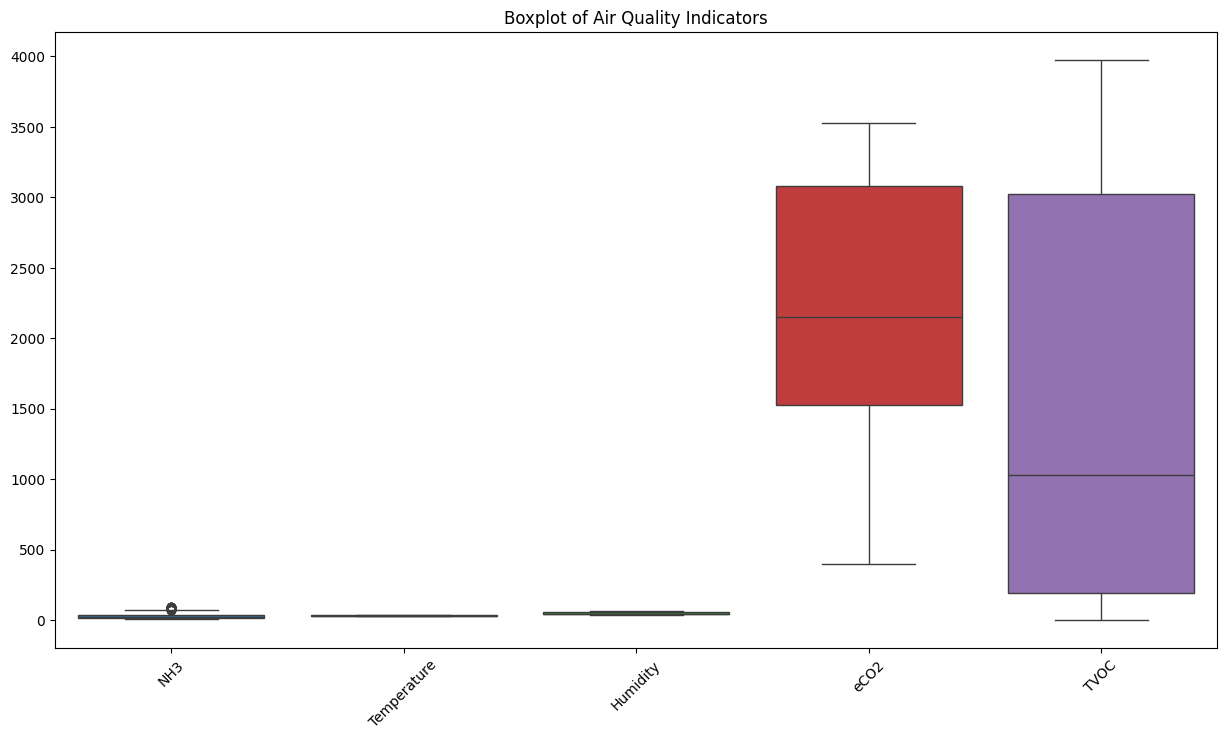

In [70]:
# ทำกราฟ boxplot AQI_PM2.5	AQI_PM10	AQI_O3	AQI_SO2	AQI_NO2	AQI_CO	NH3	Temperature	Humidity	eCO2	TVOC

plt.figure(figsize=(15, 8))
sns.boxplot(data=df[['NH3', 'Temperature', 'Humidity', 'eCO2', 'TVOC']])
plt.xticks(rotation=45)
plt.title('Boxplot of Air Quality Indicators')
plt.show()


In [71]:
def replace_outliers_with_quartiles(df):

    for column in df.select_dtypes(include=['number']).columns:

        # Used to cycle through all numeric columns in the DataFrame.

        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # To identify outliers, lower and upper limits are calculated and values ​​
        # outside these limits are considered outliers.

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # For each column, we identify outliers and replace them with Q1 or Q3.
        # We do this using a lambda function. If the value is less than the lower bound,
        #it is replaced with Q1. If it is greater than the upper bound,
        #it is replaced with Q3.
        #In the last case, the value is not changed and remains the same.

        df[column] = df[column].apply(
            lambda x: Q1 if x < lower_bound else (Q3 if x > upper_bound else x)
        )

    return df

df = replace_outliers_with_quartiles(df)

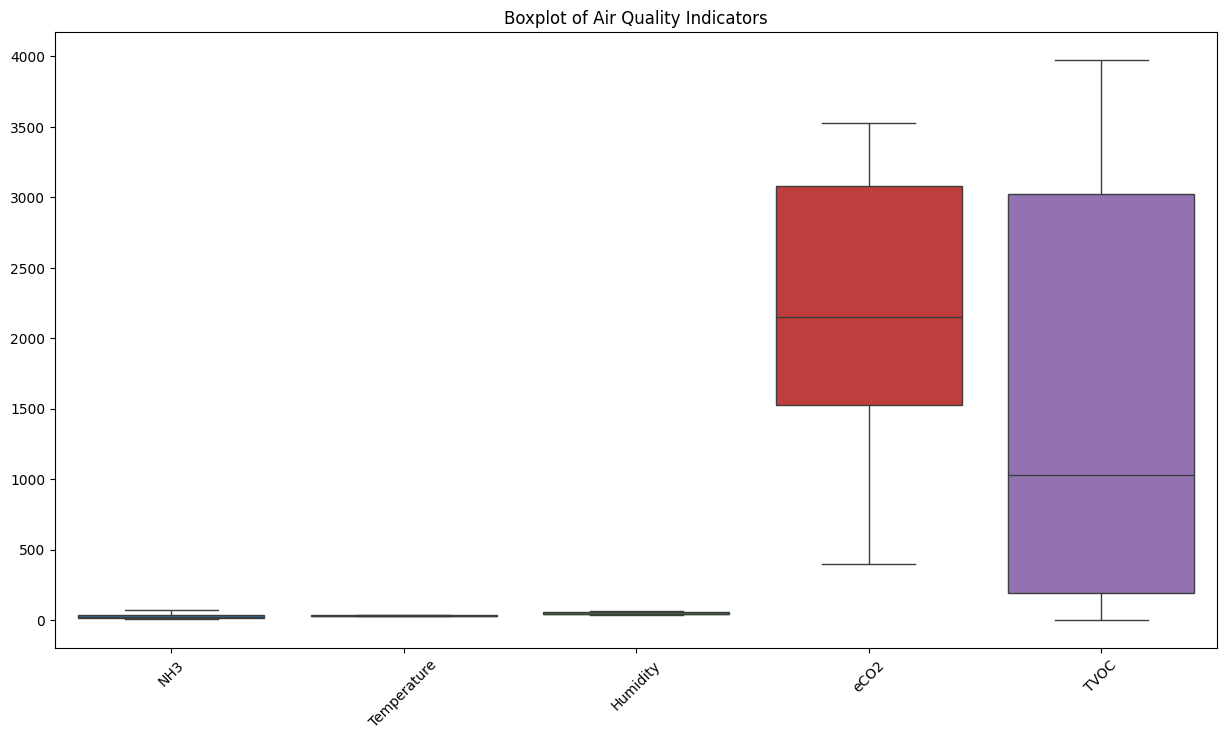

In [72]:
# ทำกราฟ boxplot AQI_PM2.5	AQI_PM10	AQI_O3	AQI_SO2	AQI_NO2	AQI_CO	NH3	Temperature	Humidity	eCO2	TVOC

plt.figure(figsize=(15, 8))
sns.boxplot(data=df[['NH3', 'Temperature', 'Humidity', 'eCO2', 'TVOC']])
plt.xticks(rotation=45)
plt.title('Boxplot of Air Quality Indicators')
plt.show()

## Feature Engineering

In [81]:
def create_target(row):
    if row['NH3'] > 50 or row['eCO2'] > 1000 or row['TVOC'] > 500:
        return 'Bad'
    elif 30 <= row['NH3'] <= 50 and 600 <= row['eCO2'] <= 1000:
        return 'Medium'
    else:
        return 'Good'

df['air_quality_target'] = df.apply(create_target, axis=1)

In [74]:
df.columns

Index(['Date_Time', 'NH3', 'Temperature', 'Humidity', 'eCO2', 'TVOC',
       'air_quality_target'],
      dtype='object')

In [83]:
# prompt: air_quality_target ทำการ lebal encoding

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'air_quality_target' column
df['air_quality_target'] = label_encoder.fit_transform(df['air_quality_target'])

# Now 'air_quality_target' column contains numerical labels
print(df['air_quality_target'].unique()) # Display unique encoded labels
print(list(label_encoder.inverse_transform(df['air_quality_target'].unique()))) # Display original labels


[1 0 2]
['Good', 'Bad', 'Medium']


## Split

In [84]:
enc_columns = ['NH3', 'Temperature' , 'Humidity' , 'eCO2', 'TVOC']
X = df[enc_columns]
X.head()

,NH3,Temperature,Humidity,eCO2,TVOC
0,17.368391,29.799999,42.400002,844,67
1,23.182974,35.700001,36.299999,1032,96
2,17.685310,30.000000,40.700001,1310,138
3,18.279758,30.299999,43.599998,1060,100
4,18.279758,30.299999,43.599998,1060,100


In [85]:
y = df['air_quality_target']
y

,air_quality_target
0,1
1,0
2,0
3,0
4,0
...,...
49995,1
49996,1
49997,0
49998,0


In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [87]:
X_train.shape , X_test.shape

((35000, 5), (15000, 5))

In [88]:
y_train.shape , y_test.shape

((35000,), (15000,))

In [89]:
X_train

,NH3,Temperature,Humidity,eCO2,TVOC
39613,11.343486,29.900000,40.000000,2014,771
32382,23.981403,31.600000,41.500000,2315,1390
708,15.979048,29.799999,42.099998,857,69
29245,40.168892,37.000000,61.299999,3288,3473
11513,41.133980,31.900000,47.099998,1093,105
...,...,...,...,...,...
23452,21.342892,36.799999,53.599998,3232,3347
23775,27.368511,36.900002,55.799999,3389,3686
37135,12.524769,30.200001,43.299999,2098,920
27098,39.461029,37.099998,60.900002,3418,3749


In [90]:
y_train

,air_quality_target
39613,0
32382,0
708,1
29245,0
11513,0
...,...
23452,0
23775,0
37135,0
27098,0


In [91]:
X_test

,NH3,Temperature,Humidity,eCO2,TVOC
18991,30.953545,35.299999,53.900002,3276,3447
41632,10.717145,30.400000,45.599998,2257,1262
36306,14.240314,29.400000,39.400002,2132,987
26881,38.766464,37.000000,60.099998,3480,3862
3469,16.724243,30.600000,42.099998,1105,107
...,...,...,...,...,...
21738,23.770620,35.200001,45.400002,3063,2985
40264,11.107548,30.200001,42.200001,2224,1197
4836,17.658703,29.200001,39.099998,1245,128
47533,9.529802,29.900000,40.599998,2207,1152


In [92]:
y_test

,air_quality_target
18991,0
41632,0
36306,0
26881,0
3469,0
...,...
21738,0
40264,0
4836,0
47533,0


In [94]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import joblib  # สำหรับบันทึกโมเดล

# 📌 Standardization การปรับค่าให้ เฉลี่ย
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [111]:
# 📌 ใช้ PCA ลดมิติ (ถ้าจำนวน feature เยอะ)
pca = PCA(n_components=2)  # ลดเหลือ 5 มิติ (ปรับตาม dataset)
X_train_pca = pca.fit_transform(X_train_scaled)

In [112]:
# 📌 Train KNN ด้วย K ที่ดีที่สุด
knn = KNeighborsClassifier(n_neighbors=8, weights="distance")
knn.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=8, weights='distance')

✅ Accuracy: 0.9952666666666666
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13537
           1       0.99      0.98      0.98      1347
           2       0.95      0.82      0.88       116

    accuracy                           1.00     15000
   macro avg       0.98      0.93      0.95     15000
weighted avg       1.00      1.00      1.00     15000



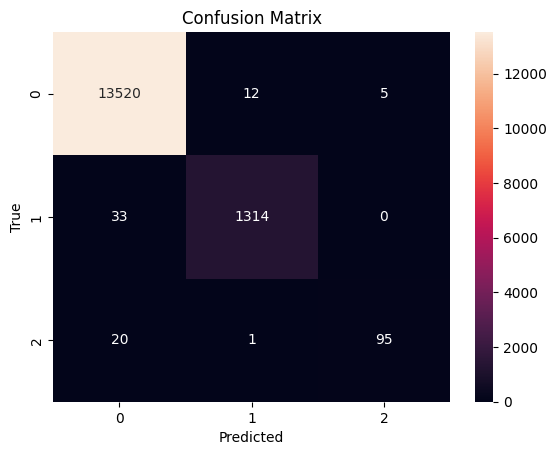

In [113]:
# 📌 ทดสอบโมเดลกับข้อมูลทดสอบ
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)
y_pred = knn.predict(X_test_pca)

# 📌 วัดความแม่นยำ
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

# แสดง Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [114]:
# เช็ด overfitting ด้วย cross-validation

# 📌 Use cross-validation to prevent overfitting
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(knn, X_train_pca, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", np.mean(cv_scores))

# Train the model on the entire training set using the best k (if needed)
knn.fit(X_train_pca, y_train)

# ... rest of your code for testing and evaluation


Cross-validation scores: [0.99542857 0.99428571 0.99428571 0.99614286 0.99385714]
Average cross-validation score: 0.9948


KNeighborsClassifier(n_neighbors=8, weights='distance')

In [115]:
# prompt: dump pkl ของ model , pca , Standardization ใน folder CPE495

import joblib
import os

# Create the directory if it doesn't exist
directory = "/content/drive/MyDrive/CPE407"
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the model, pca, and scaler
joblib.dump(knn, os.path.join(directory, 'knn_model2.pkl'))
joblib.dump(pca, os.path.join(directory, 'pca2.pkl'))
joblib.dump(scaler, os.path.join(directory, 'scaler2.pkl'))


['/content/drive/MyDrive/CPE407/scaler2.pkl']